# Day 03 - Performing Regression with `scikit-learn`

In [1]:
# necessary imports for this notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks') # setting style
sns.set_context('talk') # setting context
sns.set_palette('colorblind') # setting palette

In [2]:
stellar = pd.read_csv('https://raw.githubusercontent.com/dannycab/MSU_REU_ML_course/refs/heads/main/activities/data/star_classification.csv')
stellar.head()

# remove all the columns that are not needed
df_stellar = stellar[['obj_ID', 'class', 'u', 'g', 'r', 'i', 'z','redshift']]

# drop any row with negative photometric values
filter = (df_stellar['u'] >= 0) & (df_stellar['g'] >= 0) & (df_stellar['r'] >= 0) & (df_stellar['i'] >= 0) & (df_stellar['z'] >= 0)
df_stellar = df_stellar[filter]

# describe the data again
df_stellar.describe()

,obj_ID,u,g,r,i,z,redshift
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,1.237665e+18,22.080679,20.631583,19.645777,19.084865,18.768988,0.576667
std,8.438450e+12,2.251068,2.037384,1.854763,1.757900,1.765982,0.730709
min,1.237646e+18,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971
25%,1.237659e+18,20.352410,18.965240,18.135795,17.732280,17.460830,0.054522
50%,1.237663e+18,22.179140,21.099930,20.125310,19.405150,19.004600,0.424176
75%,1.237668e+18,23.687480,22.123775,21.044790,20.396510,19.921120,0.704172
max,1.237681e+18,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


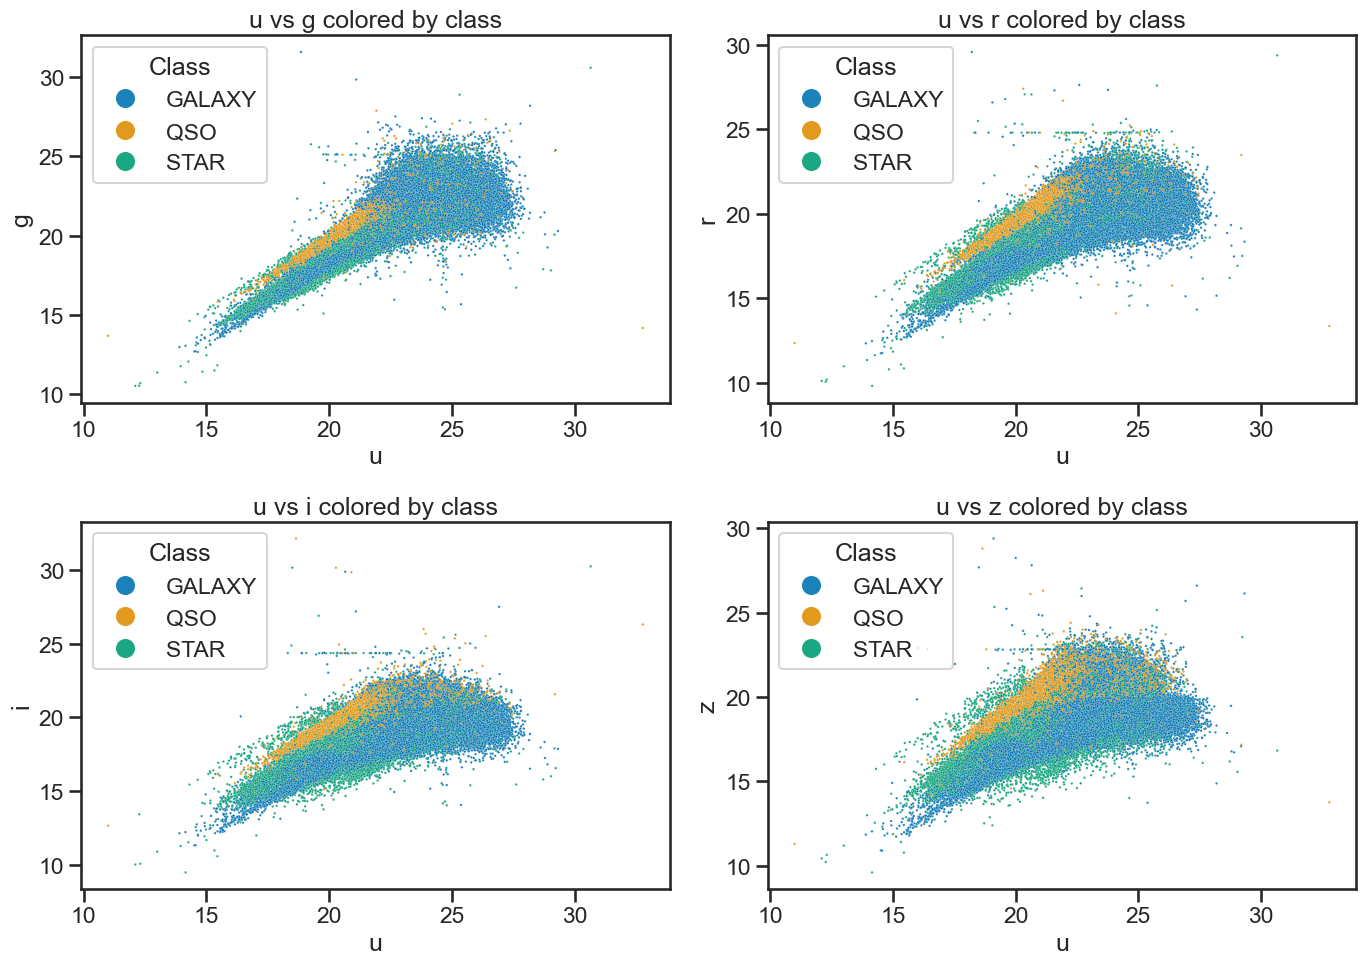

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# u vs g
sns.scatterplot(x='u', y='g', hue='class', data=df_stellar, ax=axes[0, 0], alpha=0.9, s=3)
axes[0, 0].set_xlabel('u')
axes[0, 0].set_ylabel('g')
axes[0, 0].set_title('u vs g colored by class')
axes[0, 0].legend(title='Class', loc='upper left', markerscale=8)

# u vs r
sns.scatterplot(x='u', y='r', hue='class', data=df_stellar, ax=axes[0, 1], alpha=0.9, s=3)
axes[0, 1].set_xlabel('u')
axes[0, 1].set_ylabel('r')
axes[0, 1].set_title('u vs r colored by class')
axes[0, 1].legend(title='Class', loc='upper left', markerscale=8)

# u vs i
sns.scatterplot(x='u', y='i', hue='class', data=df_stellar, ax=axes[1, 0], alpha=0.9, s=3)
axes[1, 0].set_xlabel('u')
axes[1, 0].set_ylabel('i')
axes[1, 0].set_title('u vs i colored by class')
axes[1, 0].legend(title='Class', loc='upper left', markerscale=8)

# u vs z
sns.scatterplot(x='u', y='z', hue='class', data=df_stellar, ax=axes[1, 1], alpha=0.9, s=3)
axes[1, 1].set_xlabel('u')
axes[1, 1].set_ylabel('z')
axes[1, 1].set_title('u vs z colored by class')
axes[1, 1].legend(title='Class', loc='upper left', markerscale=8)

plt.tight_layout()
plt.savefig('figures/stellar_color_diagrams.png', dpi=300)
plt.show()

In [18]:
# start a linear regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target variable
X = df_stellar[['u', 'g', 'r', 'i']]
y = df_stellar['z']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [19]:
def evaluate_regression(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    if label:
        print(f"Results for {label}:")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  R-squared: {r2:.4f}")
    return mse, r2

# Evaluate the model
evaluate_regression(y_test, y_pred, label="Linear Regression (u, g, r, i)")

Results for Linear Regression (u, g, r, i):
  Mean Squared Error: 0.1645
  R-squared: 0.9470


(0.16451171809284196, 0.9470343482118454)

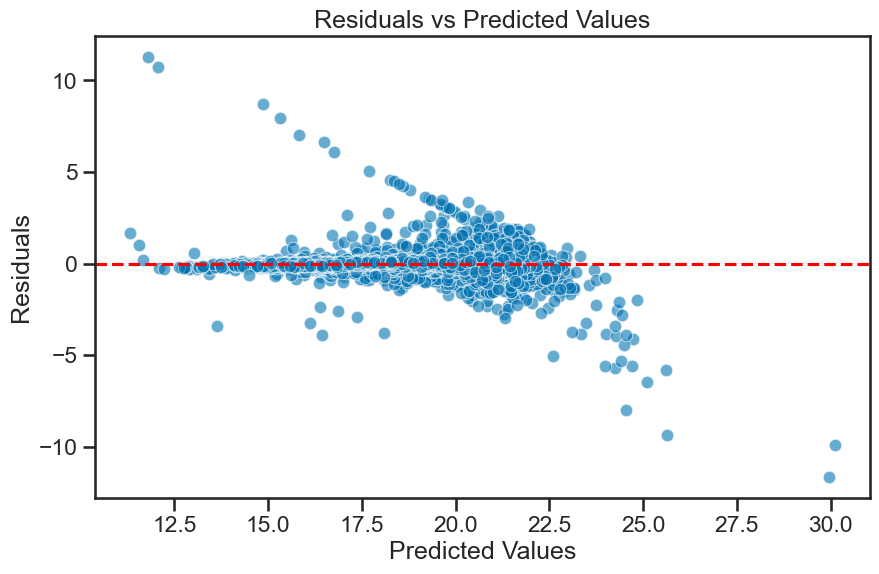

In [20]:
def plot_residuals(y_true, y_pred, title='Residuals vs Predicted Values', filename=None, ax=None):
    residuals = y_true - y_pred
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=ax)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.set_title(title)
    if filename and ax is None:
        plt.tight_layout()
        plt.savefig(filename, dpi=300)
    if ax is None:
        plt.tight_layout()
        plt.show()

# Plot residuals
plot_residuals(y_test, y_pred, filename='figures/custom_residuals_plot.png')

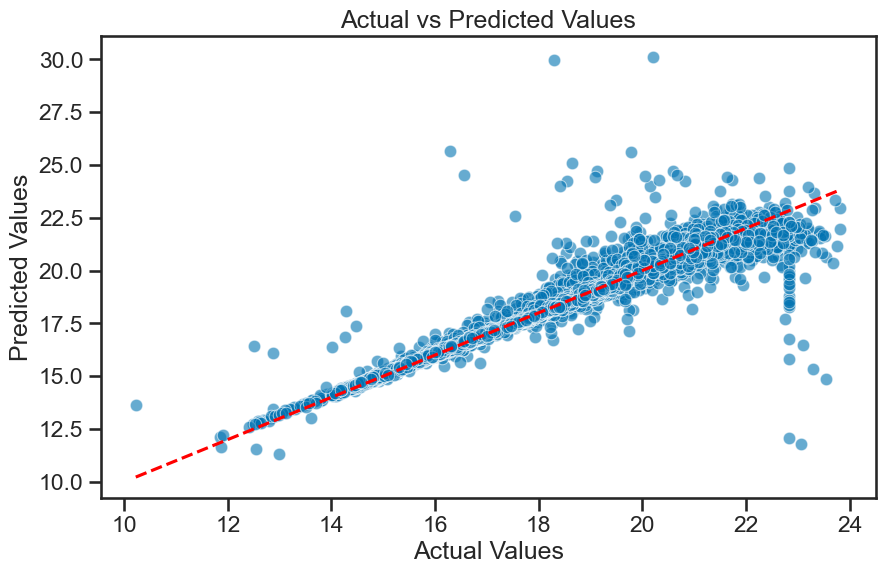

In [21]:
def plot_actual_vs_predicted(y_true, y_pred, title='Actual vs Predicted Values', filename=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, ax=ax)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(title)
    if filename and ax is None:
        plt.tight_layout()
        plt.savefig(filename, dpi=300)
    if ax is None:
        plt.tight_layout()
        plt.show()

# Plot actual vs predicted values
plot_actual_vs_predicted(y_test, y_pred, filename='figures/stellar_regression_results.png')

In [22]:
coefficients = model.coef_
print(coefficients)
print(X.columns)

[ 0.01160737 -0.43194222  0.2577279   1.82800805]
Index(['u', 'g', 'r', 'i'], dtype='object')


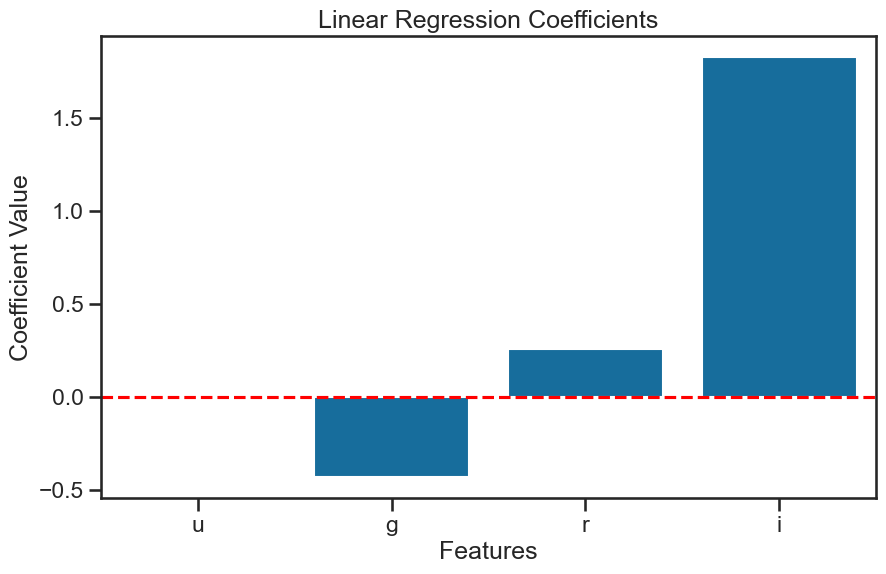

In [23]:
def plot_coefficients(model, feature_names, title='Model Coefficients', filename=None, ax=None):
    coefficients = model.coef_
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=feature_names, y=coefficients, ax=ax)
    ax.set_xlabel('Features')
    ax.set_ylabel('Coefficient Value')
    ax.set_title(title)
    ax.axhline(0, color='red', linestyle='--')
    if filename and ax is None:
        plt.tight_layout()
        plt.savefig(filename, dpi=300)
    if ax is None:
        plt.tight_layout()
        plt.show()
    
# Plot the coefficients of the linear regression model
plot_coefficients(model, X.columns, title='Linear Regression Coefficients', filename='figures/stellar_regression_coefficients.png')

In [ ]:
# Sort the coefficients by their absolute values
# Use those column orders to build a series of models

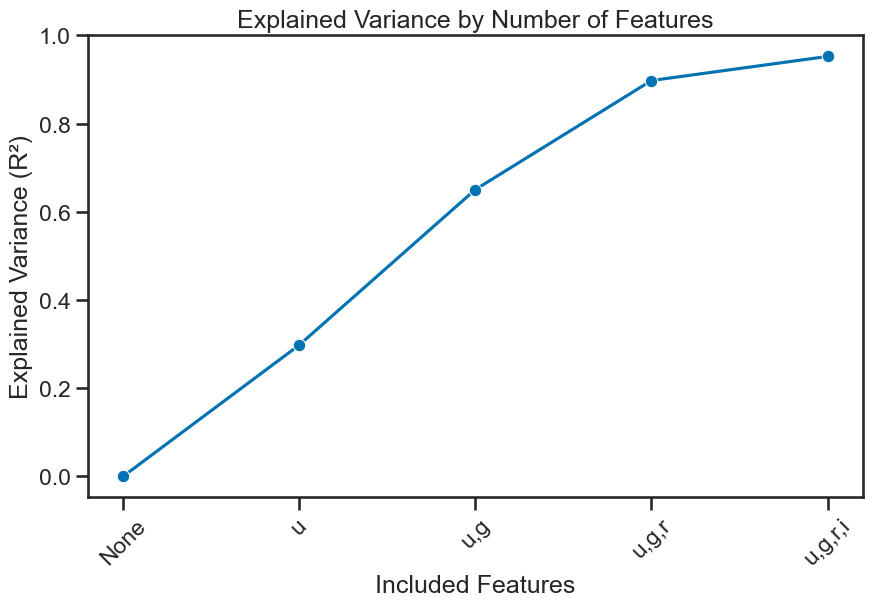

In [24]:
def plot_explained_variance(model, X, y, title='Explained Variance by Number of Features', filename=None, ax=None):
    explained_variance = [0]  # Start with 0 for no variables
    feature_labels = ['None']
    for i in range(1, len(X.columns) + 1):
        model.fit(X.iloc[:, :i], y)
        explained_variance.append(model.score(X.iloc[:, :i], y))
        feature_labels.append(','.join(X.columns[:i]))
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(x=range(len(feature_labels)), y=explained_variance, marker='o', ax=ax)
    ax.set_xticks(range(len(feature_labels)))
    ax.set_xticklabels(feature_labels, rotation=45)
    ax.set_xlabel('Included Features')
    ax.set_ylabel('Explained Variance (R²)')
    ax.set_title(title)
    if filename and ax is None:
        plt.tight_layout()
        plt.savefig(filename, dpi=300)
    if ax is None:
        plt.tight_layout()
        plt.show()

# Plot the explained variance ratio
plot_explained_variance(model, X, y, title='Explained Variance by Number of Features', filename='figures/stellar_explained_variance.png')

Results for Linear Regression (u, g, r, i, redshift):
  Mean Squared Error: 0.1641
  R-squared: 0.9472


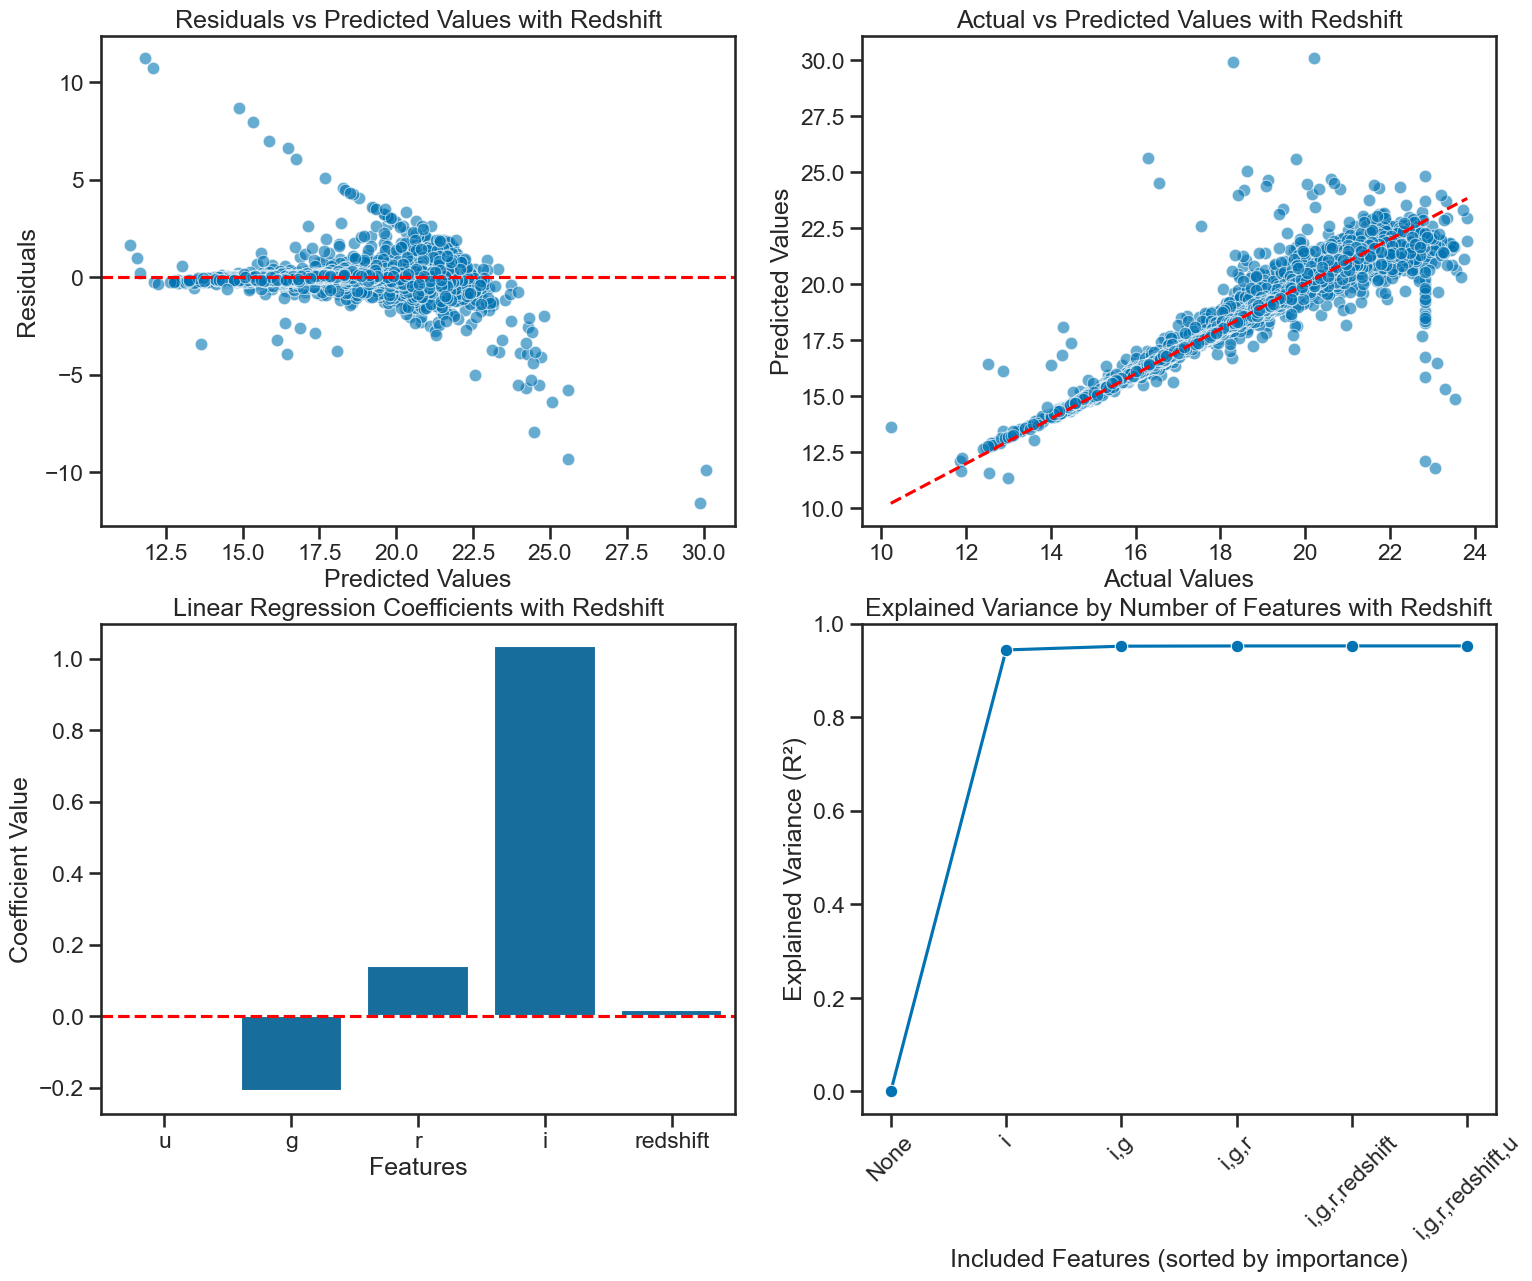

In [13]:
# Add redshift to the features and see if it improves the model.
X = df_stellar[['u', 'g', 'r', 'i', 'redshift']]

# Split the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a new linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the new model using the custom function
evaluate_regression(y_test, y_pred, label="Linear Regression (u, g, r, i, redshift)")

fig, axs = plt.subplots(2, 2, figsize=(18, 14))
plot_residuals(y_test, y_pred, title='Residuals vs Predicted Values with Redshift', ax=axs[0, 0])
plot_actual_vs_predicted(y_test, y_pred, title='Actual vs Predicted Values with Redshift', ax=axs[0, 1])
plot_coefficients(model, X.columns, title='Linear Regression Coefficients with Redshift', ax=axs[1, 0])
plot_explained_variance(model, X, y, title='Explained Variance by Number of Features with Redshift', ax=axs[1, 1])

Results for Linear Regression with Dummies:
  Mean Squared Error: 0.1626
  R-squared: 0.9476


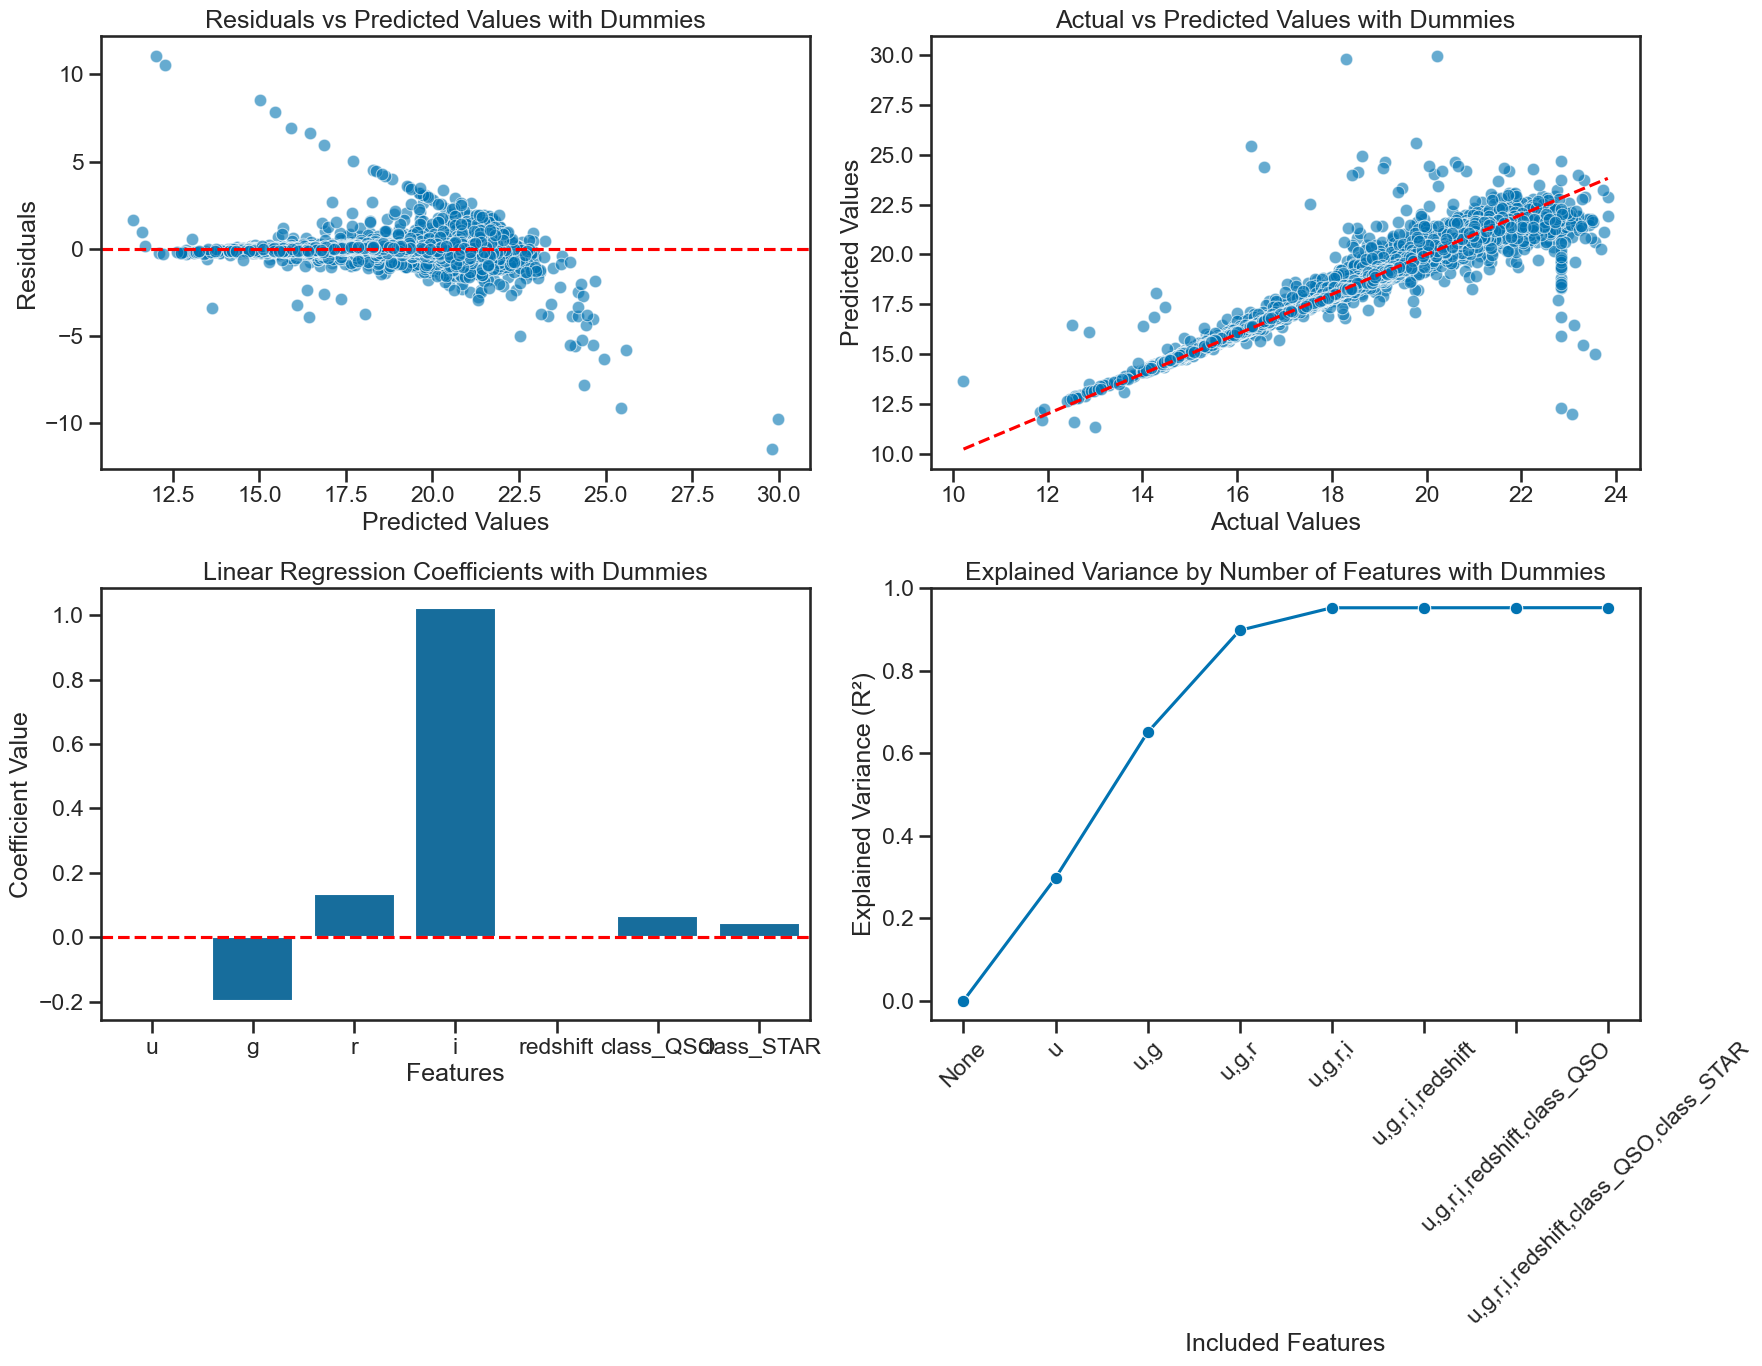

In [18]:
# Create dummy variables for the 'class' column
df_stellar_dummies = pd.get_dummies(df_stellar, columns=['class'], drop_first=True)

# Define the features and target variable again
X = df_stellar_dummies.drop(columns=['obj_ID', 'z'])
y = df_stellar_dummies['z']

# Split the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a new linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the new model using the custom function
evaluate_regression(y_test, y_pred, label="Linear Regression with Dummies")

fig, axs = plt.subplots(2, 2, figsize=(18, 14))
plot_residuals(y_test, y_pred, title='Residuals vs Predicted Values with Dummies', ax=axs[0, 0])
plot_actual_vs_predicted(y_test, y_pred, title='Actual vs Predicted Values with Dummies', ax=axs[0, 1])
plot_coefficients(model, X.columns, title='Linear Regression Coefficients with Dummies', ax=axs[1, 0])
plot_explained_variance(model, X, y, title='Explained Variance by Number of Features with Dummies', ax=axs[1, 1])
plt.tight_layout()
plt.savefig('figures/stellar_regression_dummies_subplots.png', dpi=300)
plt.show()

## By Class

Results for Linear Regression for class GALAXY:
  Mean Squared Error: 0.1253
  R-squared: 0.9543


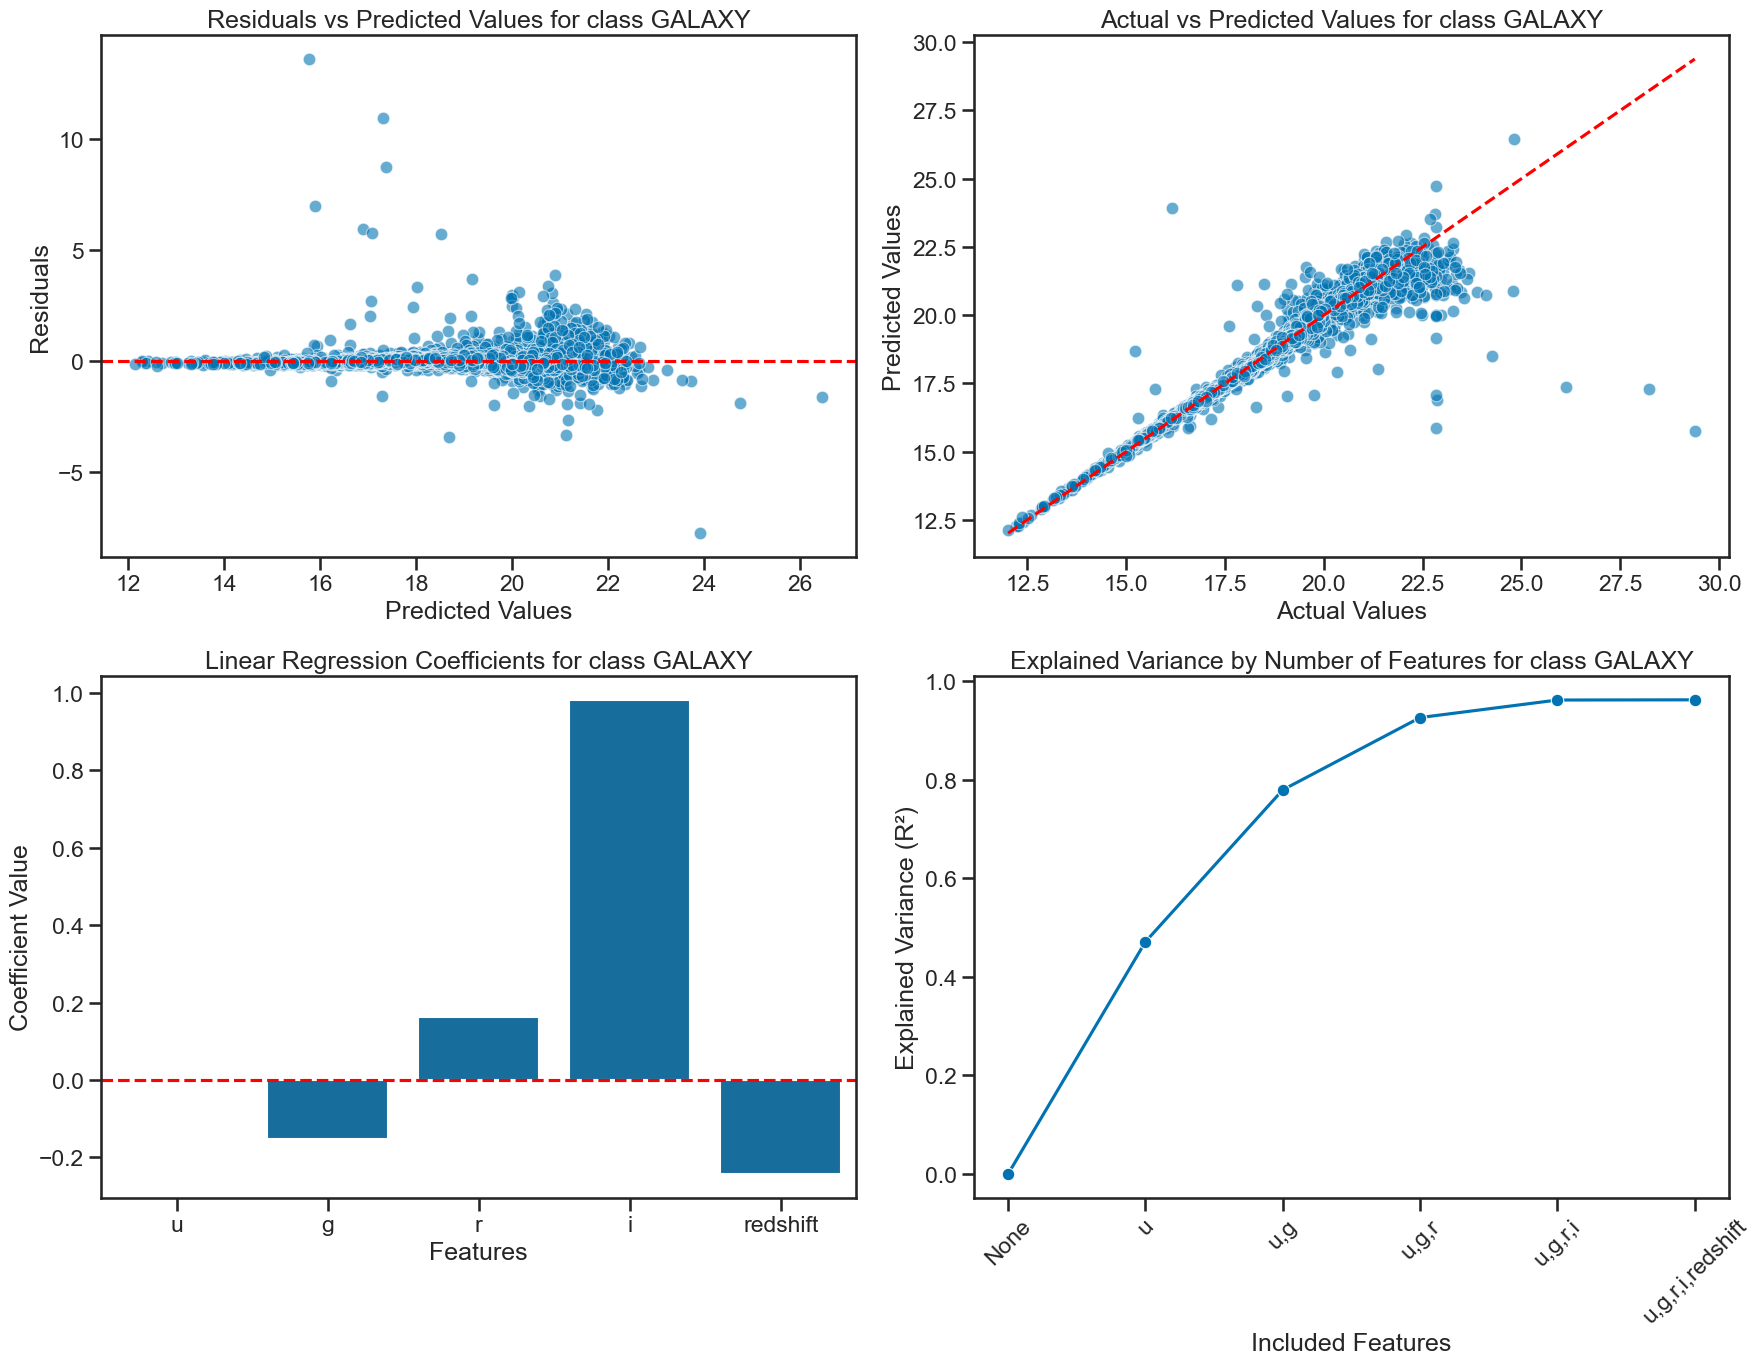

Results for Linear Regression for class QSO:
  Mean Squared Error: 0.1550
  R-squared: 0.8668


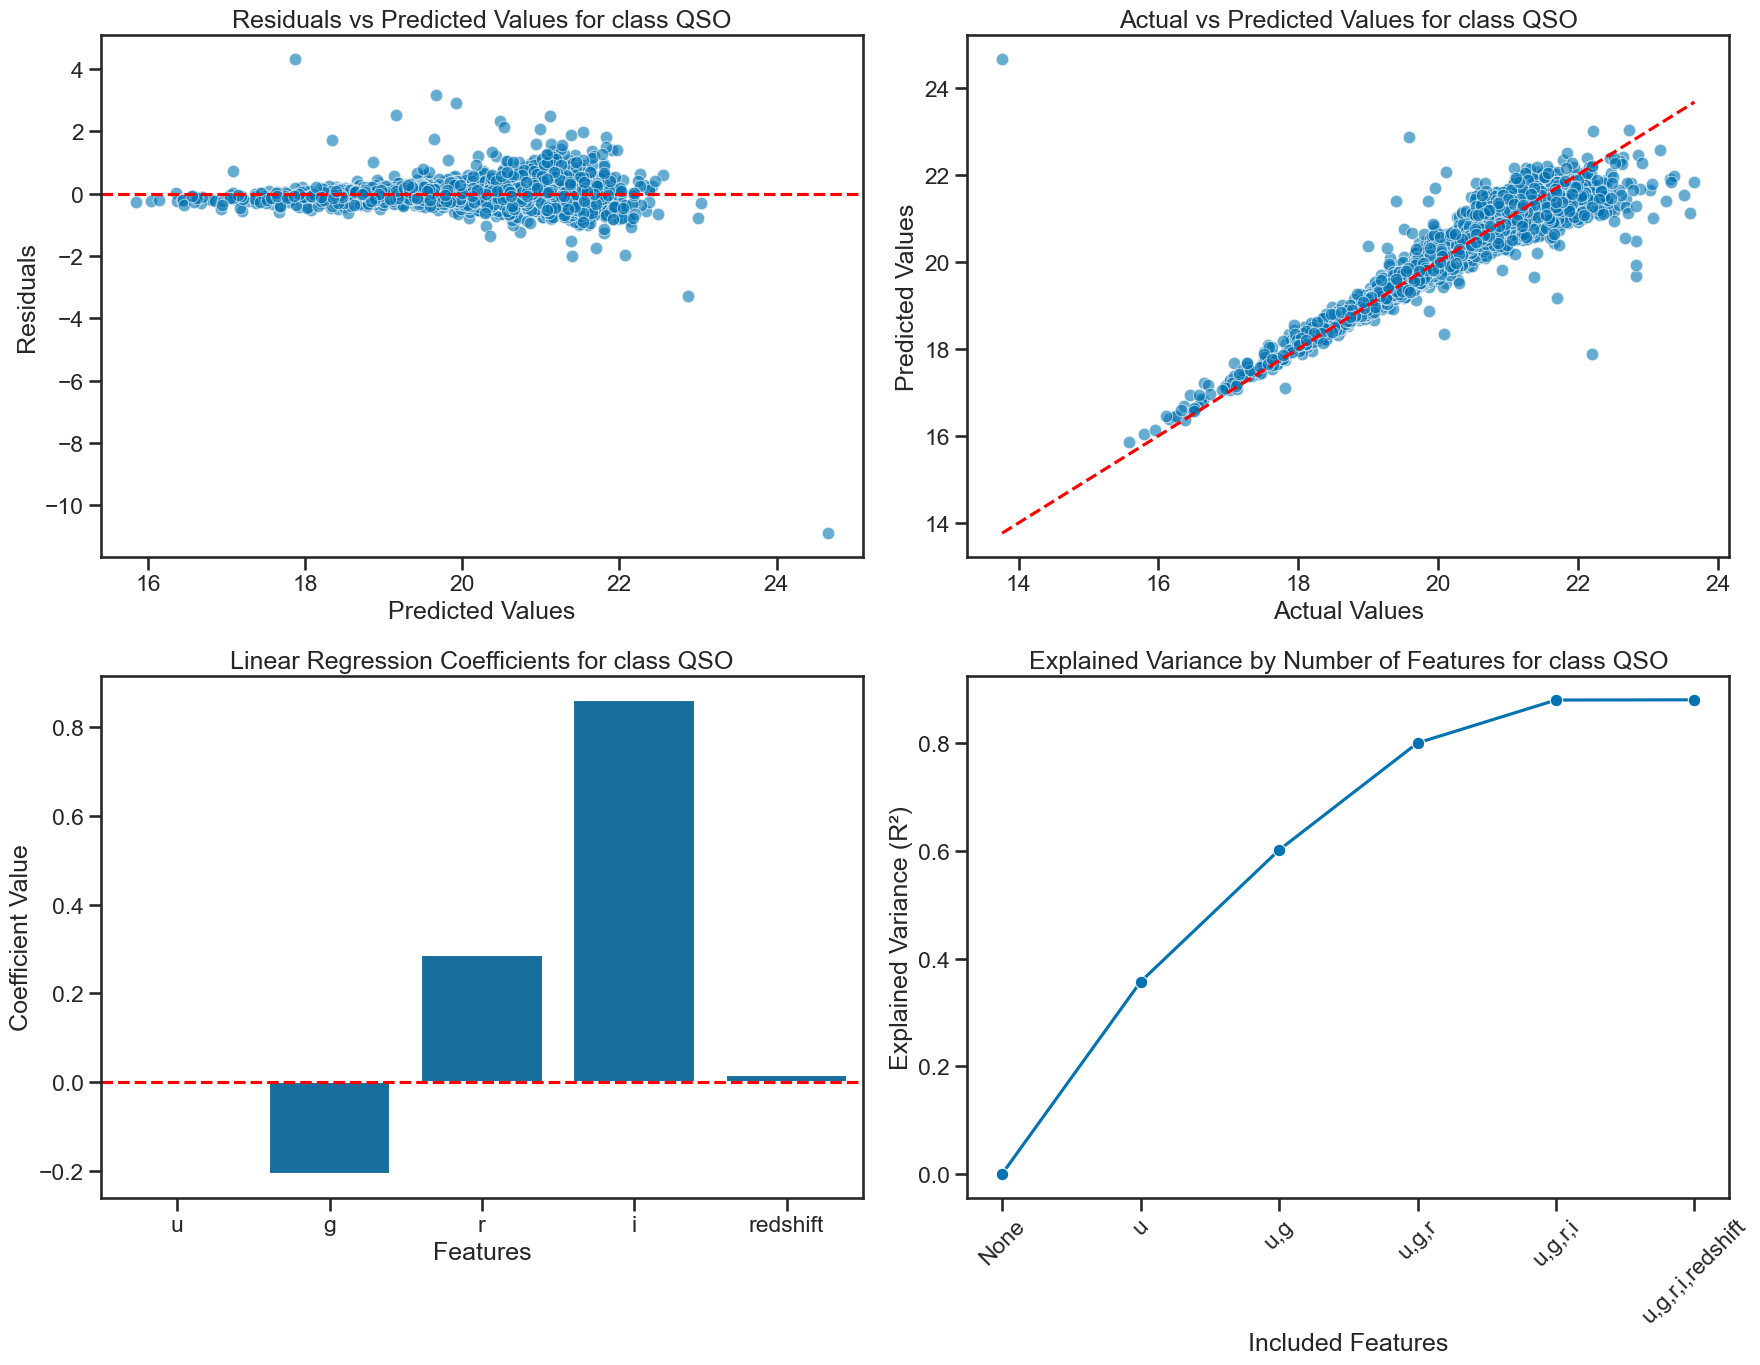

Results for Linear Regression for class STAR:
  Mean Squared Error: 0.2491
  R-squared: 0.9270


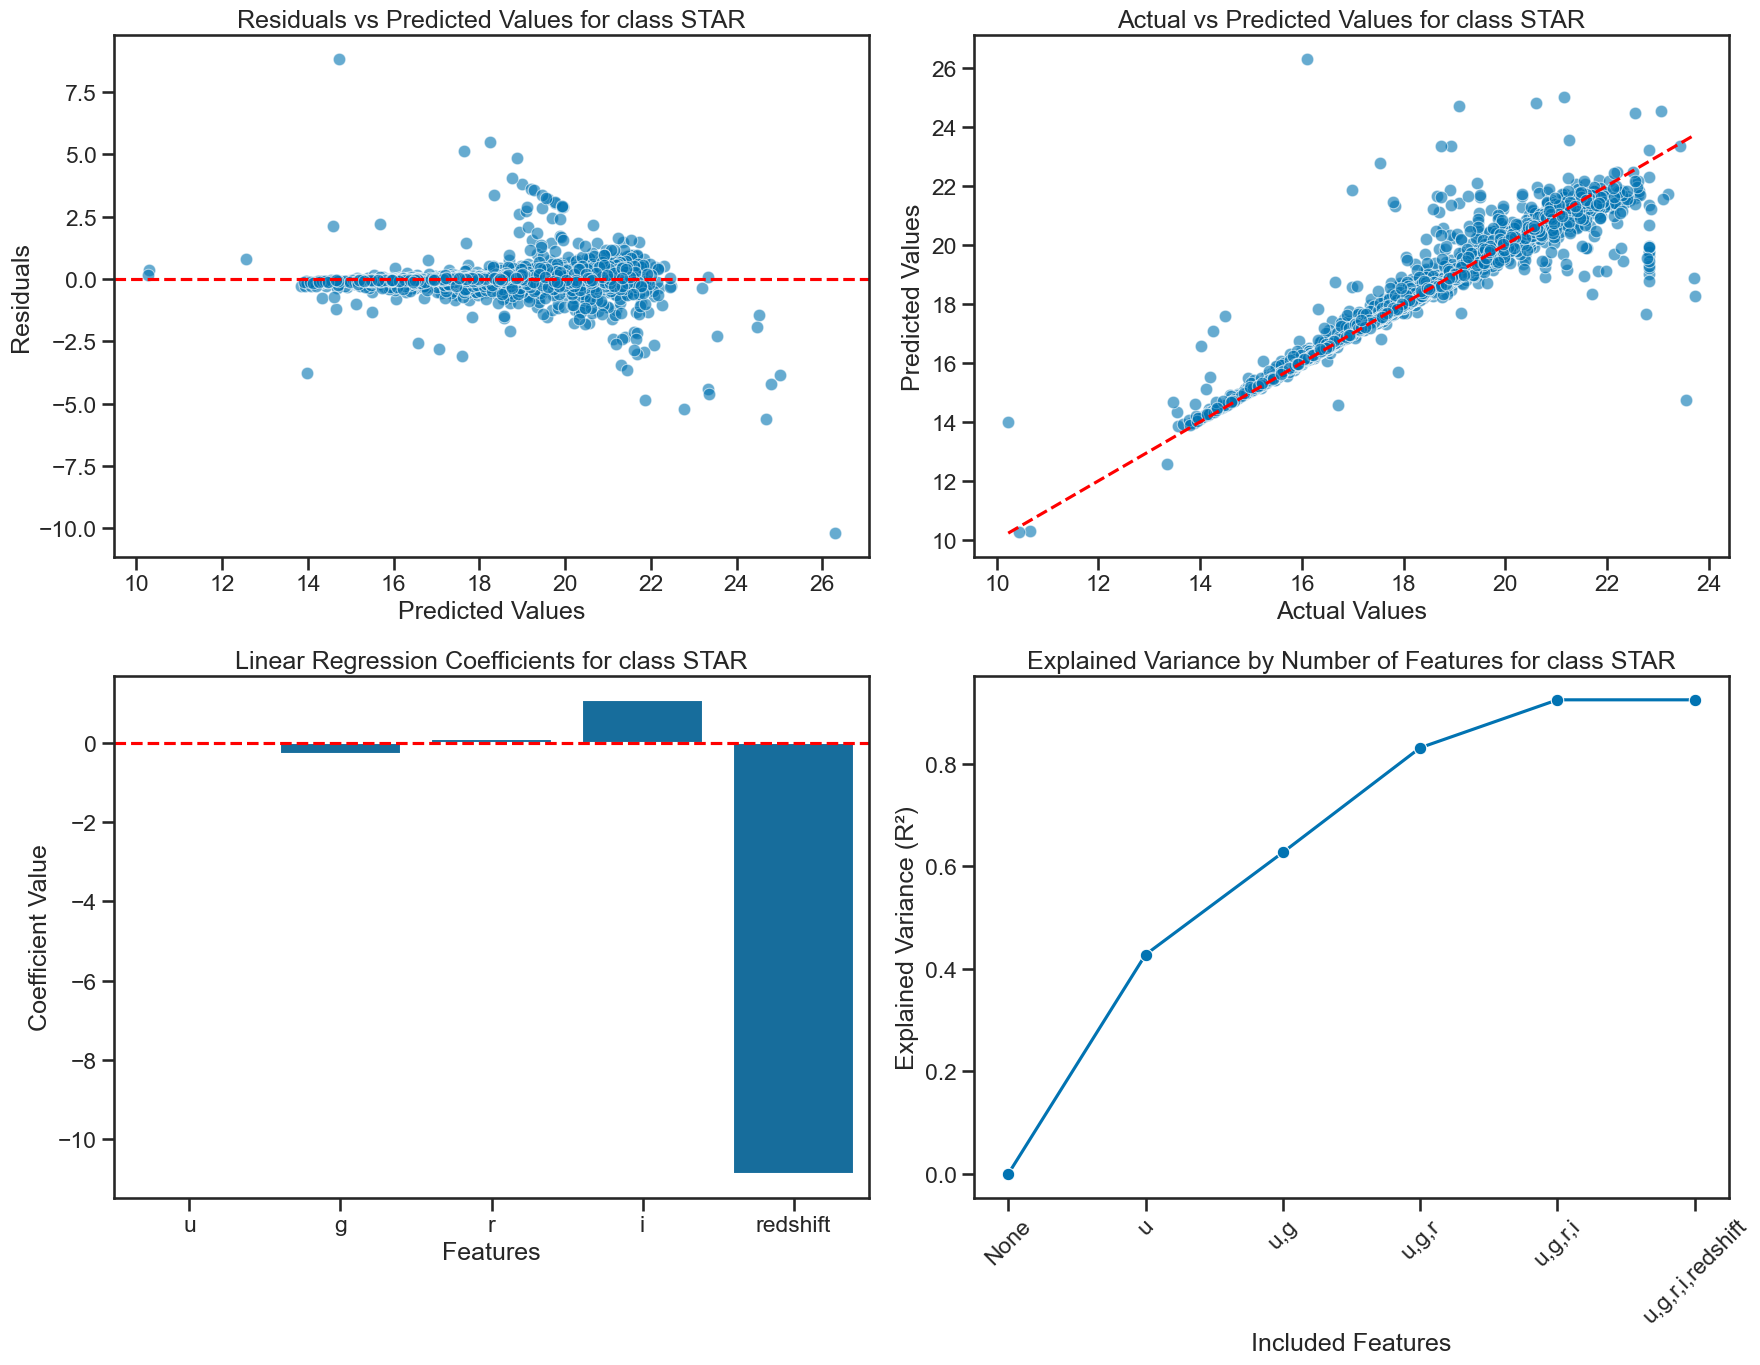

In [19]:
# Seperate the classes and see if they can be predicted separately
classes = df_stellar['class'].unique()
## make sure the code holds all the predicted values for each class's model, so they can be visualized later
## use sci-kit learn's LinearRegression to predict each class separately
predictions = {}

for cls in classes:
    df_class = df_stellar[df_stellar['class'] == cls]
    X = df_class.drop(columns=['obj_ID', 'z', 'class'])
    y = df_class['z']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and fit a new linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    evaluate_regression(y_test, y_pred, label=f"Linear Regression for class {cls}")
    # Store predictions and test values for later visualization
    predictions[cls] = {'y_test': y_test, 'y_pred': y_pred, 'model': model, 'X_test': X_test, 'X_train': X_train}

    # 2x2 plotting for each class
    fig, axs = plt.subplots(2, 2, figsize=(18, 14))
    plot_residuals(y_test, y_pred, title=f'Residuals vs Predicted Values for class {cls}', ax=axs[0, 0])
    plot_actual_vs_predicted(y_test, y_pred, title=f'Actual vs Predicted Values for class {cls}', ax=axs[0, 1])
    plot_coefficients(model, X.columns, title=f'Linear Regression Coefficients for class {cls}', ax=axs[1, 0])
    plot_explained_variance(model, X, y, title=f'Explained Variance by Number of Features for class {cls}', ax=axs[1, 1])
    plt.tight_layout()
    plt.savefig(f'figures/stellar_regression_{cls}_subplots.png', dpi=300)
    plt.show()
    
    

In [23]:
# Great let's try using a more complex model, like a Random Forest Regressor, to see if it improves the predictions.
# Let's focus on the STAR only because it has the highest MSE.

# Extract the STAR class data
df_star = df_stellar[df_stellar['class'] == 'STAR']

# Define the features and target variable
X_star = df_star.drop(columns=['obj_ID', 'z', 'class'])
y_star = df_star['z']

# Split the data into training and testing sets
X_train_star, X_test_star, y_train_star, y_test_star = train_test_split(X_star, y_star, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
# Create and fit a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train_star, y_train_star)

# Make predictions on the test set
y_pred_star = rf_model.predict(X_test_star)

# Evaluate the Random Forest model
evaluate_regression(y_test_star, y_pred_star, label="Random Forest Regressor for STAR class")

Results for Random Forest Regressor for STAR class:
  Mean Squared Error: 0.1627
  R-squared: 0.9523


(0.16273835640183296, 0.9522887118905891)

In [24]:
def plot_coefficients(model, feature_names, title='Model Coefficients', filename=None, ax=None):
    # Use coef_ for linear models, feature_importances_ for tree-based models
    if hasattr(model, "coef_"):
        coefficients = model.coef_
        ylabel = 'Coefficient Value'
    elif hasattr(model, "feature_importances_"):
        coefficients = model.feature_importances_
        ylabel = 'Feature Importance'
    else:
        raise AttributeError("Model does not have coef_ or feature_importances_ attribute.")
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=feature_names, y=coefficients, ax=ax)
    ax.set_xlabel('Features')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.axhline(0, color='red', linestyle='--') if hasattr(model, "coef_") else None
    if filename and ax is None:
        plt.tight_layout()
        plt.savefig(filename, dpi=300)
    if ax is None:
        plt.tight_layout()
        plt.show()

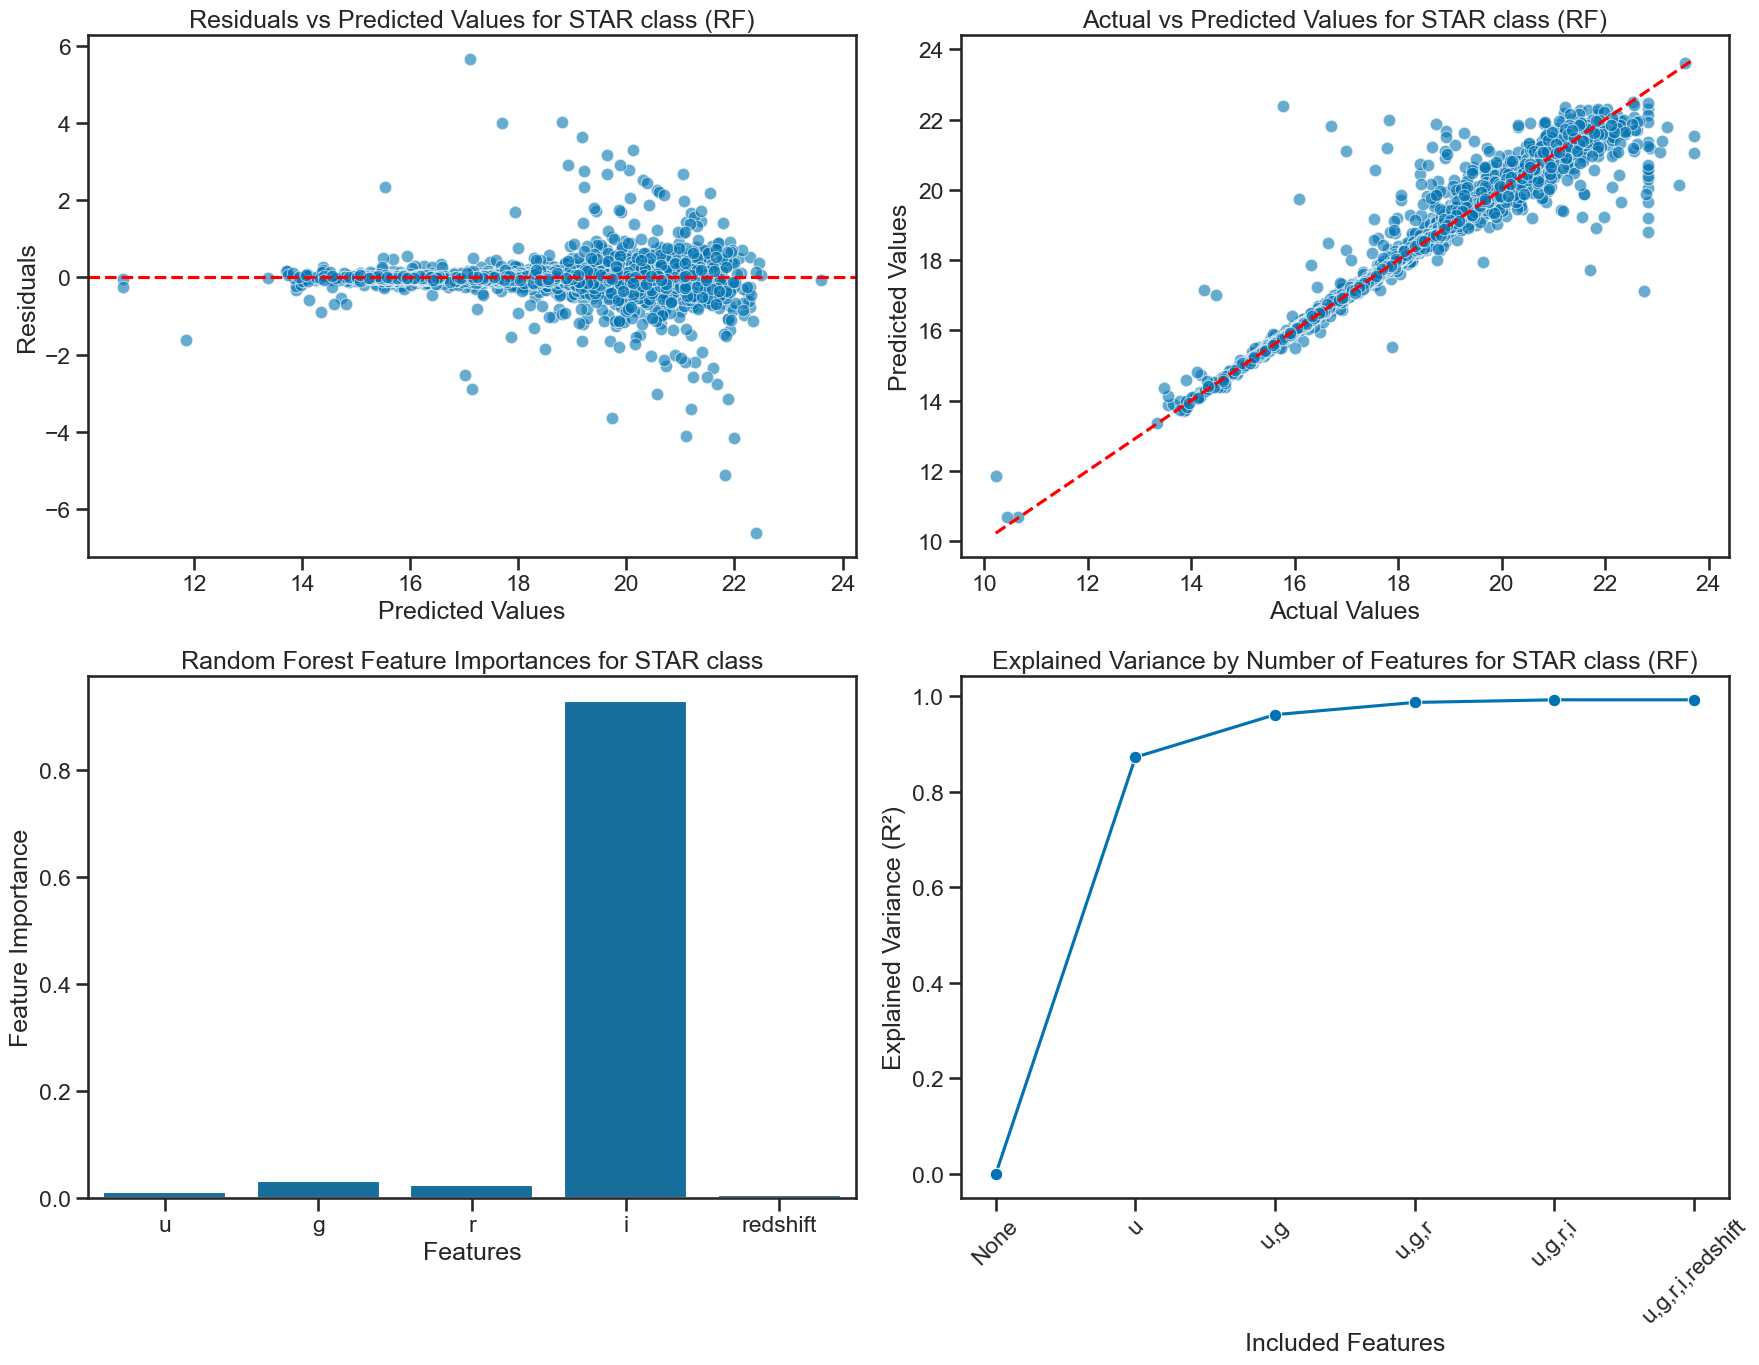

In [25]:
# 2x2 plotting for the Random Forest Regressor on STAR class
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
plot_residuals(y_test_star, y_pred_star, title='Residuals vs Predicted Values for STAR class (RF)', ax=axs[0, 0])
plot_actual_vs_predicted(y_test_star, y_pred_star, title='Actual vs Predicted Values for STAR class (RF)', ax=axs[0, 1])
plot_coefficients(rf_model, X_star.columns, title='Random Forest Feature Importances for STAR class', ax=axs[1, 0])
plot_explained_variance(rf_model, X_star, y_star, title='Explained Variance by Number of Features for STAR class (RF)', ax=axs[1, 1])
plt.tight_layout()
plt.savefig('figures/stellar_rf_regression_star_subplots.png', dpi=300)
plt.show()

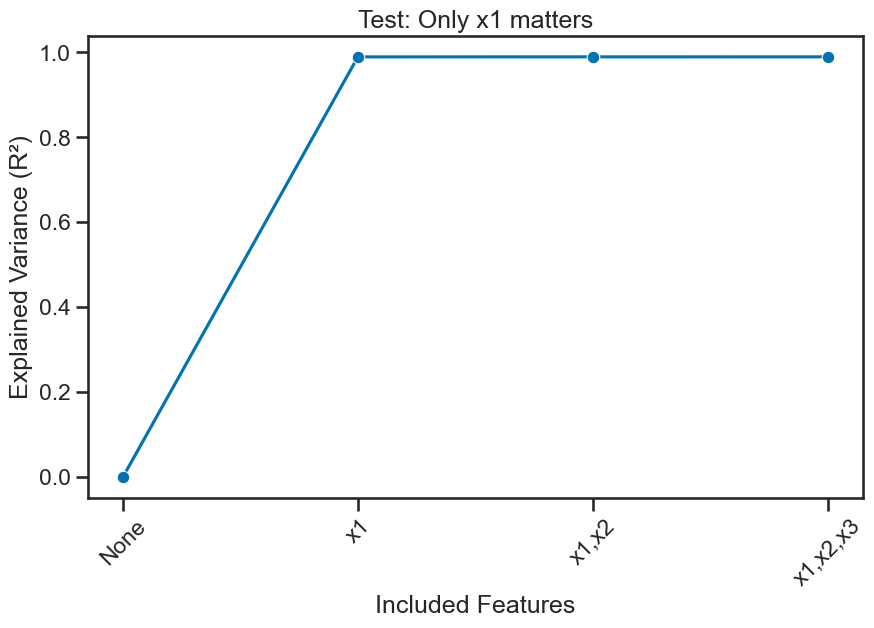

In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a dataset where only x1 matters
np.random.seed(0)
X = pd.DataFrame({
    'x1': np.linspace(0, 10, 100),
    'x2': np.random.normal(0, 1, 100),
    'x3': np.random.normal(0, 1, 100)
})
y = 3 * X['x1'] + np.random.normal(0, 1, 100)

model = LinearRegression()
plot_explained_variance(model, X, y, title='Test: Only x1 matters')

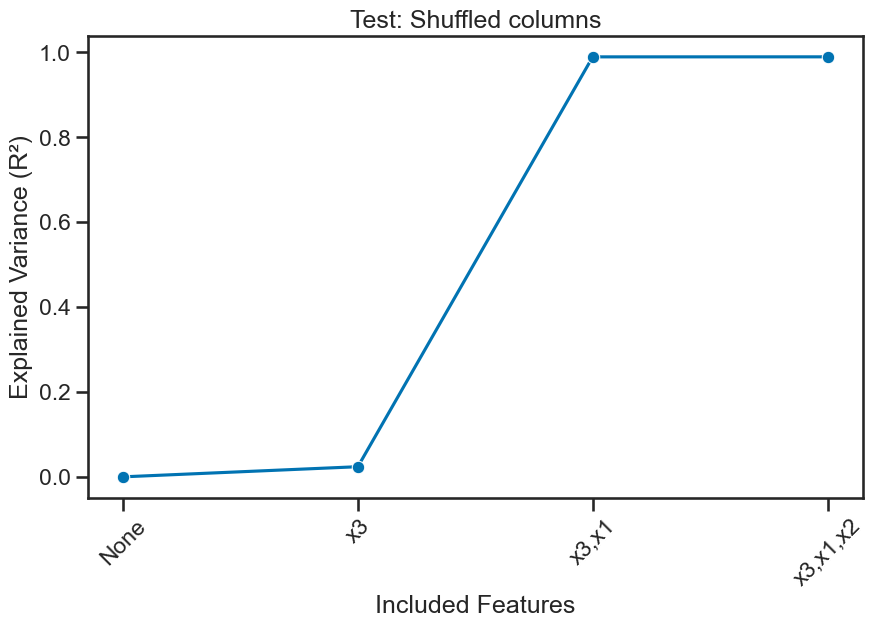

In [27]:
X_shuffled = X[['x3', 'x1', 'x2']]
plot_explained_variance(model, X_shuffled, y, title='Test: Shuffled columns')

In [28]:
model.fit(X, y)
print("Coefficients:", model.coef_)

Coefficients: [3.03479392 0.07372869 0.0595065 ]


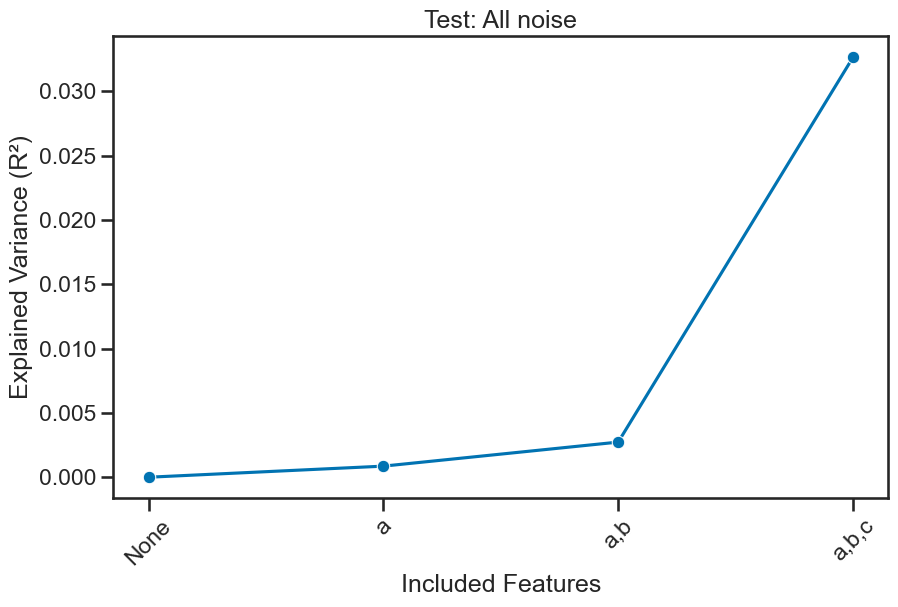

In [29]:
X_noise = pd.DataFrame(np.random.normal(0, 1, (100, 3)), columns=['a', 'b', 'c'])
y_noise = np.random.normal(0, 1, 100)
plot_explained_variance(model, X_noise, y_noise, title='Test: All noise')